# Medical Insurance Charges Prediction
## Model and Preprocessing Step:

In [1]:
import numpy as np 
import pandas as pd

In [2]:
# Load the data into pandas dataframe
df = pd.read_csv('./data/Train_Data.csv')
df

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452


In [3]:
# Function to preprocess the data using one-hot encoding
def preprocess_inputs(df):
    
    df = df.copy()
    sex_wrapper = {'male':0, 'female':1}
    df.sex = df.sex.replace(sex_wrapper)

    df.smoker.value_counts()
    smoker_wrapper = {'no':0, 'yes':1}
    df.smoker = df.smoker.replace(smoker_wrapper)
    
    df = pd.get_dummies(df, columns=['region'])
    
    return df

In [4]:
# Apply one-hot encoding on the dataframe
df = preprocess_inputs(df)

In [5]:
# Check for missing value in the columns
df.isna().sum()
# This DF has no missing values

age                 0
sex                 0
bmi                 0
smoker              0
children            0
charges             0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [6]:
# View the data after one-hot encoding
df

,age,sex,bmi,smoker,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,21.000000,0,25.745000,0,2,3279.868550,1,0,0,0
1,36.976978,1,25.744165,1,3,21454.494239,0,0,1,0
2,18.000000,0,30.030000,0,1,1720.353700,0,0,1,0
3,37.000000,0,30.676891,0,3,6801.437542,1,0,0,0
4,58.000000,0,32.010000,0,1,11946.625900,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3625,48.820767,1,41.426984,0,4,10987.324964,0,1,0,0
3626,38.661977,1,26.202557,0,2,11735.844352,0,0,1,0
3627,56.000000,0,40.300000,0,0,10602.385000,0,0,0,1
3628,48.061207,1,34.930624,0,1,8976.140452,0,0,1,0


In [7]:
# Let's inspect the attributes
df.describe()

,age,sex,bmi,smoker,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,0.441047,30.629652,0.154270,2.503581,12784.808644,0.233609,0.250964,0.281267,0.234160
std,12.151029,0.496581,5.441307,0.361257,1.712568,10746.166743,0.423184,0.433628,0.449680,0.423531
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,26.694526,0.000000,1.000000,5654.818262,0.000000,0.000000,0.000000,0.000000
50%,39.170922,0.000000,30.200000,0.000000,3.000000,9443.807222,0.000000,0.000000,0.000000,0.000000
75%,48.343281,1.000000,34.100000,0.000000,4.000000,14680.407505,0.000000,1.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,1.000000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [8]:
# Importing module and initializing setup
from pycaret.regression import *

# Init setup and remove outliers
reg = setup(
    data = df, 
    target = 'charges', 
    numeric_features=['children'], 
    categorical_features=['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'],
    remove_outliers = True
)

,Description,Value
0,session_id,7875
1,Target,charges
2,Original Data,"(3630, 10)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2413, 9)"


### By Removing outliers, the original data of 3630 entries and 10 columns is transformed into 3503 entries,i.e, 127 entries were removed as outliers

In [9]:
# Return the best model
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1774.5885,12491893.1857,3534.3872,0.8659,0.3102,0.1936
1,1569.1492,12089271.1568,3476.9629,0.8797,0.3347,0.1327
2,1591.1740,12535028.3722,3540.4842,0.8701,0.3216,0.1496
3,1680.7214,12638335.9937,3555.0437,0.8810,0.3078,0.1870
4,1612.6065,13685105.6440,3699.3385,0.8600,0.2927,0.1633
5,1311.5468,8622375.6132,2936.3882,0.8987,0.3079,0.1817
6,1643.1406,13897574.7334,3727.9451,0.7712,0.3220,0.1857
7,1474.5617,12719737.3878,3566.4741,0.8736,0.3005,0.1740
8,2043.5460,20073344.5537,4480.3286,0.8060,0.3592,0.1694


### We see that preprocessing data we got RMSE to be 3595 which is less than 4587 which we got without preprocessing the data

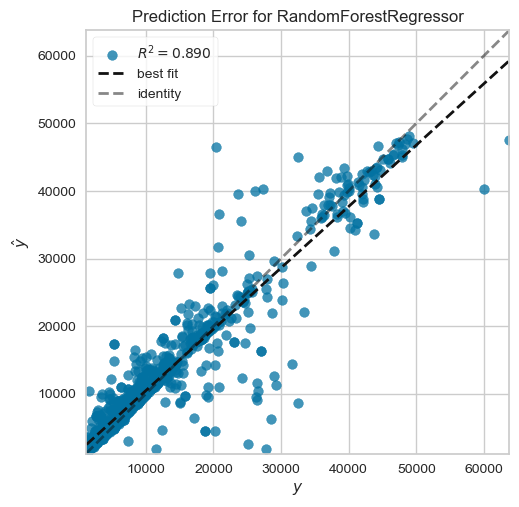

In [10]:
plot_model(rf, plot = 'error')

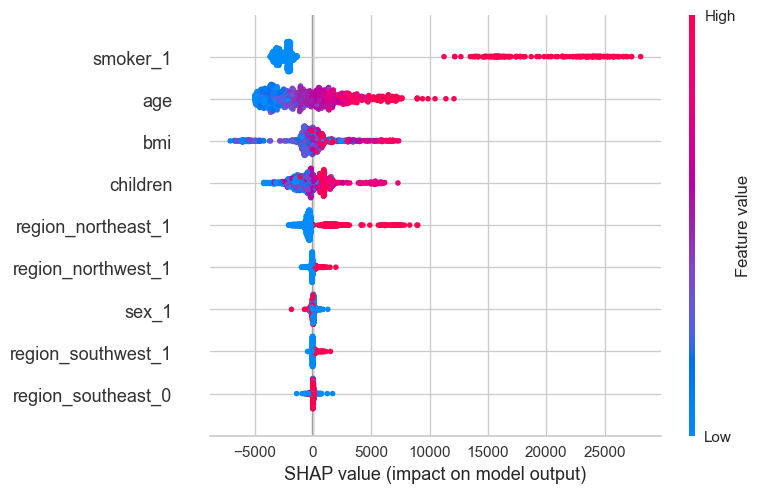

In [11]:
# Interpreting the model
interpret_model(rf)

In [12]:
# finalize a model - use all the data in training
final_rf = finalize_model(rf)

In [13]:
def addMissingColumns(df):
    if 'region_northeast' not in df:
        df['region_northeast'] = 0
    if 'region_northwest' not in df:
        df['region_northwest'] = 0
    if 'region_southeast' not in df:
        df['region_southeast'] = 0
    if 'region_southwest' not in df:
        df['region_southwest'] = 0

In [14]:
# generate predictions on unseen data
test_data = pd.DataFrame({'age': [35], 
                          'sex': ['female'], 
                          'bmi': [21], 
                          'children' : [0], 
                          'smoker': ['no'], 
                          'region': ['southeast']})


# Preprocess the unseen data
test_data = preprocess_inputs(test_data)

# Add missing columns in the unseen data
addMissingColumns(test_data)

# Predict the Insurance Charge on unseen data
predictions = predict_model(final_rf, data = test_data)
predictions

,age,sex,bmi,children,smoker,region_southeast,region_northeast,region_northwest,region_southwest,Label
0,35,1,21,0,0,1,0,0,0,5758.770027


In [15]:
# Save the model
save_model(final_rf, 'rf_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['region_northeast',
                                                             'region_northwest',
                                                             'region_southeast',
                                                             'region_southwest'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['children'],
                                       target='charges', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='...
                  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='mse', max_depth=None,
                                        max_features='auto', max_leaf_nodes=None,
   